## Exploring IMBD's Top 250 Movies (August 2024)

- IMDB Top 250: [https://www.imdb.com/chart/top/](https://www.imdb.com/chart/top/)
- Dataset: [https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv](https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv)

In [1501]:
import pandas as pd
import seaborn as sns
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import html
import httpx
from matplotlib.ticker import FuncFormatter

In [1242]:
data = pd.read_csv("IMDB_Top250.csv", index_col=[0])

In [1243]:
data.head(2)

,url,name,image,description,rating,rating_count,content_rating,genre,keywords,actors,...,release_date,rank,added_by,budget_amount,budget_currency,gross_amount,gross_currency,prestigious_award_type,prestigious_award_wins,prestigious_award_nominations
0,https://www.imdb.com/title/tt0111161/,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...,A Maine banker convicted of the murder of his ...,9.3,2934407,R,['Drama'],"prison,based on the works of stephen king,esca...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",...,1994-10-14,1,1500000,25000000.0,USD,28767189.0,USD,Oscar,0.0,7.0
1,https://www.imdb.com/title/tt0068646/,The Godfather,https://m.media-amazon.com/images/M/MV5BNTc0ZD...,"Don Vito Corleone, head of a mafia family, dec...",9.2,2045292,R,"['Crime', 'Drama']","mafia,patriarch,crime family,organized crime,g...","['Marlon Brando', 'Al Pacino', 'James Caan']",...,1972-03-24,2,1300000,6000000.0,USD,136381073.0,USD,Oscar,3.0,8.0


## Preprocessing

Let's take care of the date column:

In [1246]:
data["release_date"] = pd.to_datetime(data["release_date"])

Finally, let's take care of some unescaped characters:

In [1247]:
data["name"] = data["name"].apply(html.unescape)

## Global Chart Styles

In [588]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.autolayout'] = True
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlepad"] = 40

## Films

With rank taken into account:

In [1248]:
top_films_rank = data[["rank", "name", "rating"]].drop_duplicates().sort_values(
    by=["rank", "rating"], 
    ascending=[True, False]
).head(10)

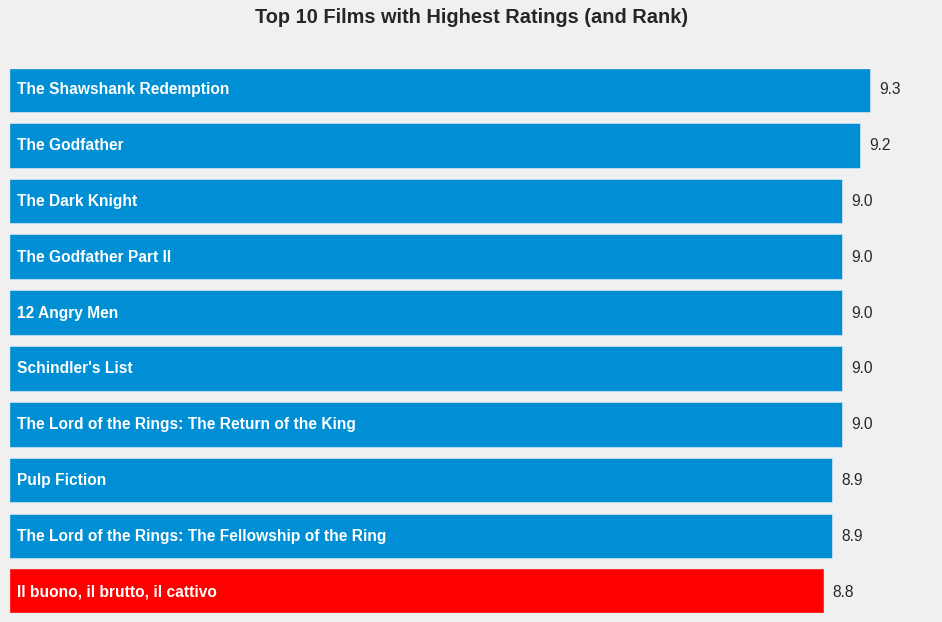

In [1249]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_rank['name'], top_films_rank['rating'])
ax.set_title("Top 10 Films with Highest Ratings (and Rank)")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_films_rank["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  



plt.savefig("top-10-rank.png")
plt.show()

Without rank taken into account:

In [1250]:
top_films_no_rank = data[["name", "rating", "rank"]].drop_duplicates().sort_values(
    by="rating",
    ascending=False
).head(10).reset_index()

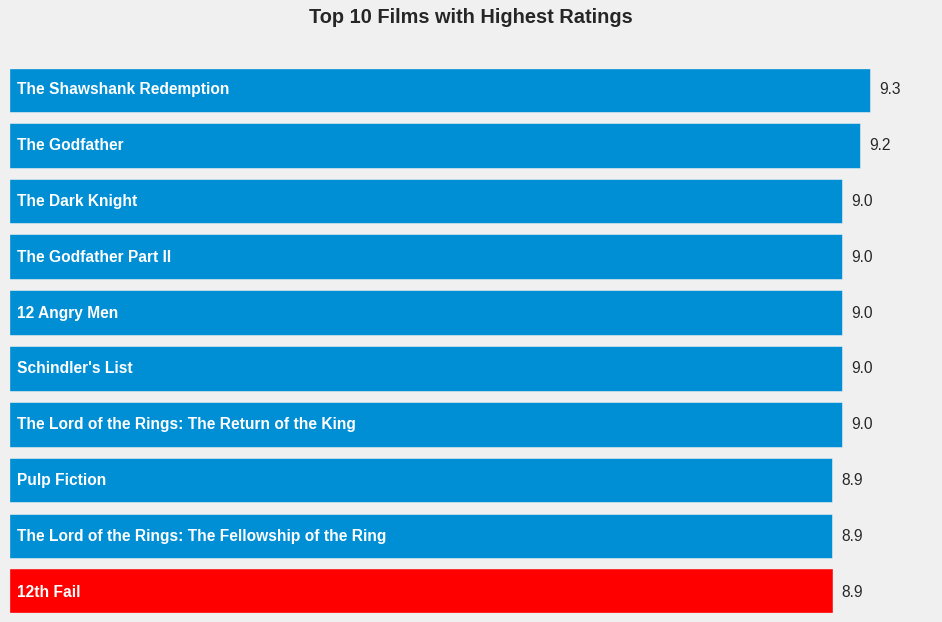

In [1251]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_no_rank['name'], top_films_no_rank['rating'])
ax.set_title("Top 10 Films with Highest Ratings")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_films_no_rank["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  



plt.savefig("top-10-no-rank.png")
plt.show()

`12th Fail` has a higher ranking (8.9) than `Il buono, il brutto, il cattivo` but less ratings (`127k` vs `883k`), which is why IMDB is placing it lower

Most ratings

In [1252]:
top_films_rating_count = data[["name", "rank", "rating_count"]].sort_values(
    by="rating_count",
    ascending=False
).head(10).reset_index(drop=True)

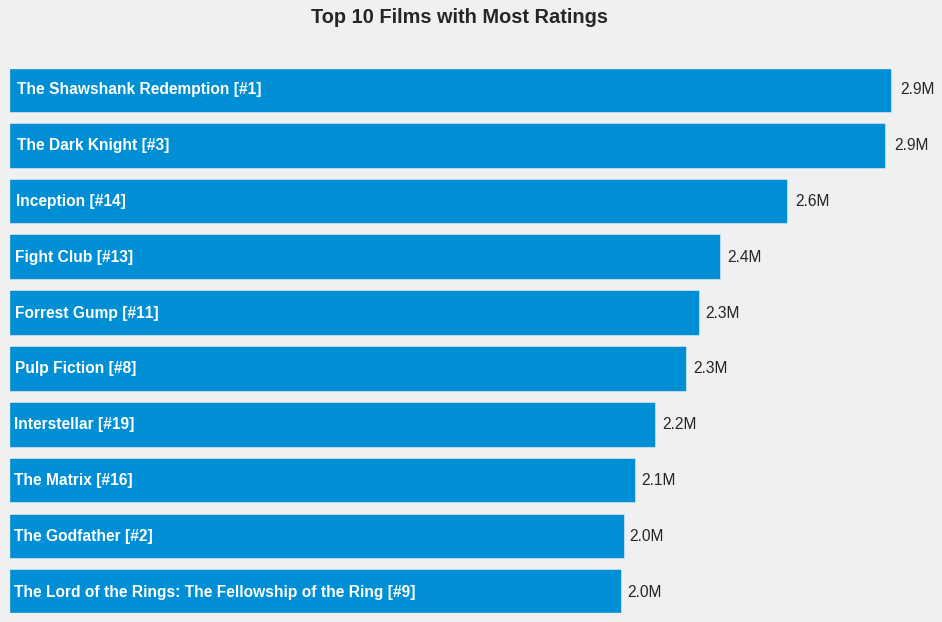

In [1464]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_rating_count['name'], top_films_rating_count['rating_count'])
ax.set_title("Top 10 Films with Most Ratings")
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(width * 0.01,
            y_position,
            f'{top_films_rating_count["name"][idx]} [#{top_films_rating_count["rank"][idx]}]',
            ha="left", va="center",  
            color="white",
            fontweight='bold')  

    ax.text(width * 1.01,     
            bar.get_y() + bar.get_height()/2.,  
            f'{top_films_rating_count["rating_count"][idx]/ 1_000_000:.1f}M',  
            ha="left", va="center")
    
    
plt.savefig("top-10-most-ratings.png")
plt.show()

Most of the films with the highest number of votes also rank among the top-rated ones.

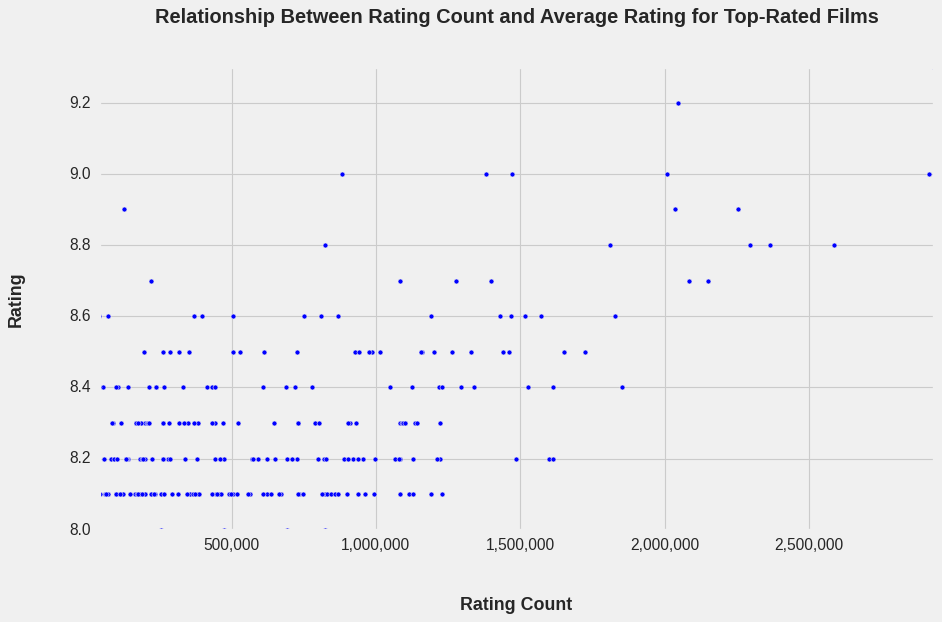

In [1465]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=True)
bars = ax.scatter(x=data['rating_count'], y=data['rating'])
ax.set_title("Relationship Between Rating Count and Average Rating for Top-Rated Films")
ax.set_ylabel("Rating", labelpad=40)
ax.set_xlabel("Rating Count", labelpad=40)
ax.set_xlim([data["rating_count"].min(), data["rating_count"].max()])
ax.set_ylim([data["rating"].min(), data["rating"].max()])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x:,.0f}"))
plt.savefig("rating-count-vs-rating.png")
plt.show()

## Decades

In [1534]:
decades_data = data[["release_year", 
                     "name",
                     "rating_count",
                     "rating",
                     "reviews",
                     "added_by",
                     "metascore",
                     "wins",
                     "nominations",
                     "content_rating",
                     "credits",
                    ]].copy()
decades_data["decade"] = data["release_year"].apply(lambda x: (x // 10) * 10)
decades_data = decades_data.groupby("decade").agg({
    "name": "count",
    "rating": "mean",
    "rating_count": "mean",
    "reviews": "sum",
    "added_by": "sum",
    "metascore": "mean",
    "wins": "mean",
    "nominations": "mean",
    "content_rating": "count",
    "credits": "mean"
})

Rating counts trend over time

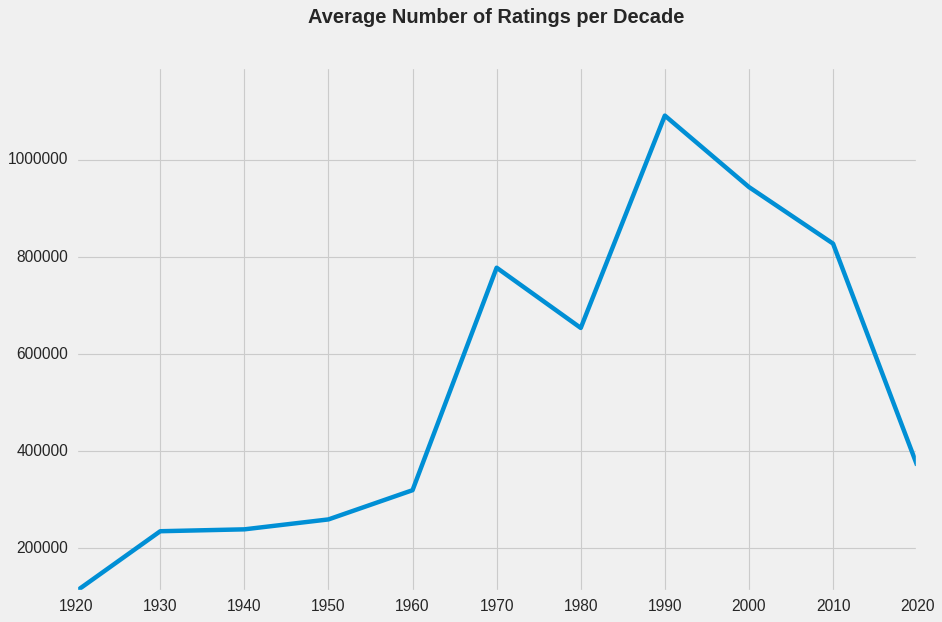

In [1467]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decades_data.index.astype(int).astype(str), decades_data["rating_count"], label='Average Rating Count')
ax.set_title("Average Number of Ratings per Decade")
ax.set_ylim([decades_data["rating_count"].min(), decades_data["rating_count"].max() + 100000])
plt.savefig("rating-count-trend.png")
plt.show()

Average rating per decade over time

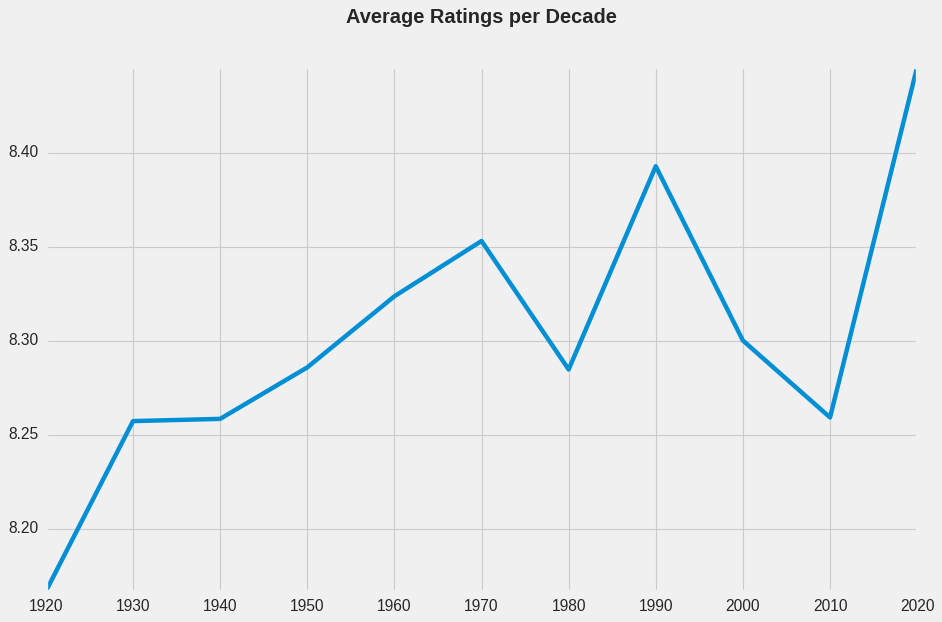

In [1468]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], label='Average Rating')
ax.set_title("Average Ratings per Decade")
ax.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])

plt.savefig("avg-ratings-per-decade.png")
plt.show()

## Strongest Decades

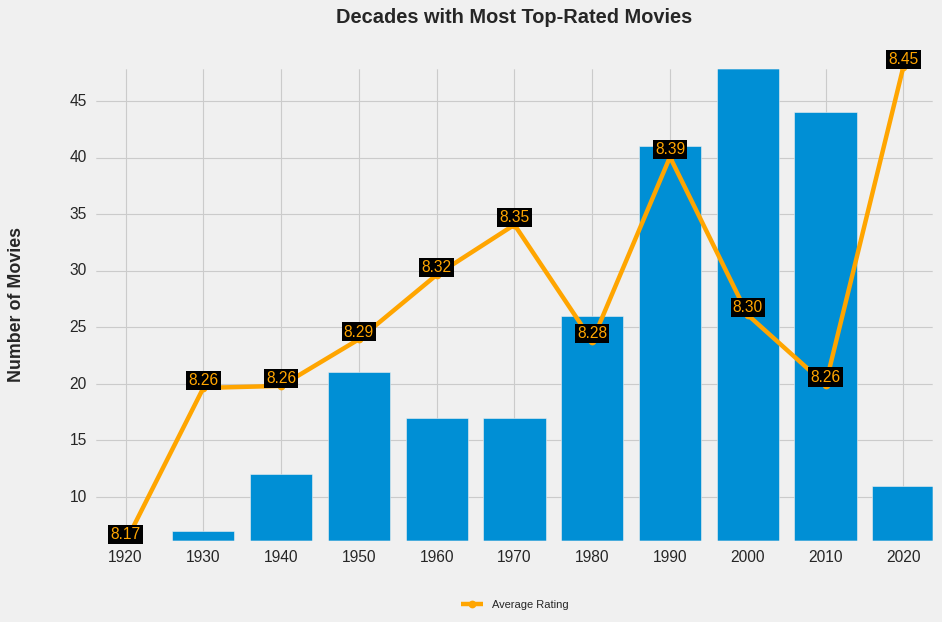

In [1472]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["name"])
ax2 = ax1.twinx()

points = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"].values, c="orange", marker='o', linestyle='-', label="Average Rating")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax1.set_title("Decades with Most Top-Rated Movies")
ax1.set_ylabel("Number of Movies", labelpad=40)
ax1.set_ylim([decades_data["name"].min(), decades_data["name"].max()])
ax2.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])
ax2.set_yticks([])

for x, y in zip(decades_data.index.astype(int).astype(str), decades_data["rating"].values):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )
plt.savefig("strongest-decades.png")
plt.show()

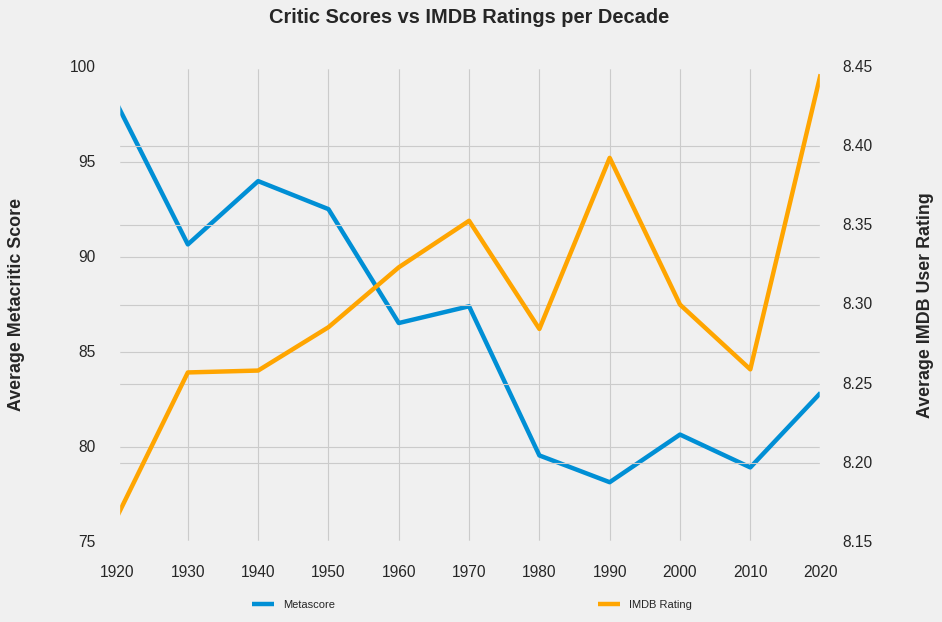

In [1475]:
fig, ax1 = plt.subplots(figsize=(12, 8))
metascore = ax1.plot(decades_data.index.astype(int).astype(str), decades_data["metascore"], label="Metascore")

ax2 = ax1.twinx()
ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  # Increase padding on the x-axis
ax1.tick_params(axis='y', pad=20)  # Increase padding on the y-axis for ax1
ax2.tick_params(axis='y', pad=20) 

ax1.legend(loc='upper center', bbox_to_anchor=(0.25, -0.1), ncol=1)
ax2.legend(loc='upper center', bbox_to_anchor=(0.75, -0.1), ncol=1)

ax1.set_title("Critic Scores vs IMDB Ratings per Decade")
ax1.set_ylabel("Average Metacritic Score", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

# points = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"].values, c="orange", marker='o', linestyle='-', label="Average Rating")
# ax1.set_title("Years With Most IMDB 250 Movies")
# ax1.set_ylabel("Number of Movies", labelpad=40)
# ax1.set_ylim([decades_data["name"].min(), decades_data["name"].max()])
# ax2.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])
# ax2.set_yticks([])

# for x, y in zip(decades_data.index.astype(int).astype(str), decades_data["rating"].values):
#     ax2.text(
#         x,
#         y,
#         f"{y:.2f}",
#         va='bottom',
#         ha='center',
#         fontsize=14,
#         color='orange',
#         bbox=dict(facecolor='black', edgecolor='none', pad=2)
#     )
plt.savefig("critics-vs-user-ratings.png")
plt.show()

## Critics' Favorites

In [1566]:
data[["name", "release_year", "metascore", "rating"]].sort_values(by="metascore", ascending=False).head(10)

,name,release_year,metascore,rating
98,Lawrence of Arabia,1962,100.0,8.3
107,Vertigo,1958,100.0,8.3
210,Tôkyô monogatari,1953,100.0,8.1
51,Rear Window,1954,100.0,8.5
104,Citizen Kane,1941,100.0,8.3
1,The Godfather,1972,100.0,9.2
46,Casablanca,1942,100.0,8.5
87,Singin' in the Rain,1952,99.0,8.3
53,City Lights,1931,99.0,8.5
145,El laberinto del fauno,2006,98.0,8.2


## Wins & Nominations

In [1619]:
most_wins_noms = data[["name", "release_year", "wins", "nominations", "rating", "prestigious_award_type", "prestigious_award_wins", "prestigious_award_nominations"]].reset_index(drop=True).sort_values(by=["wins", "nominations"], ascending=False).head(10)

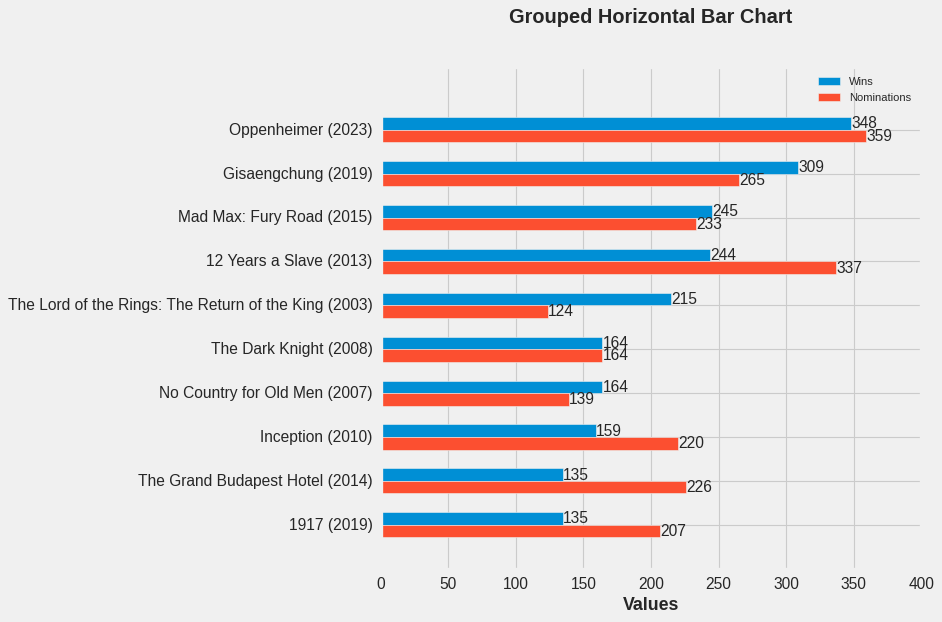

In [1639]:
categories = ['Wins', 'Nominations']

wins = ax.barh(most_wins_noms["name"], most_wins_noms["wins"], label='Wins')
noms = ax.barh(most_wins_noms["name"], most_wins_noms["nominations"], label='Nominations')

categories = ['Wins', 'Nominations']
n_categories = len(categories)
bar_width = 0.4
spacing = 1.0  # Spacing between groups
index = np.arange(len(most_wins_noms["name"])) * (bar_width + spacing)

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars
wins = ax.barh(index - bar_width/2, most_wins_noms["wins"], bar_width, label='Wins')
noms = ax.barh(index + bar_width/2, most_wins_noms["nominations"], bar_width, label='Nominations')

# Add labels and titles
ax.set_yticks(index)
yticklabels = [f'{name} ({year})' for name, year in zip(most_wins_noms["name"], most_wins_noms["release_year"])]
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Values')
ax.set_title('Grouped Horizontal Bar Chart')
ax.legend()

ax.invert_yaxis()

for i, (win, nom) in enumerate(zip(most_wins_noms["wins"], most_wins_noms["nominations"])):
    ax.text(win + 0.1, index[i] - bar_width/2, str(win), va='center')
    ax.text(nom + 0.1, index[i] + bar_width/2, str(nom), va='center')



plt.savefig("most-awards-nominations.png")
plt.show()

## Gross

In [1510]:
def adjust_for_inflation(start: str, end: str, amount: int, country: str = "united-states") -> float:
    params = {
        "country": country,
        "start": start,
        "end": end,
        "amount": amount
    }
    url = "https://www.statbureau.org/calculate-inflation-price-json"
    res = httpx.get(url, params=params)
    if res.status_code == 200:
        return float(res.json().replace("$", "").replace(" ", ""))
    return None

In [1515]:
gross = data[["name", "gross_amount", "gross_currency", "release_year"]].copy().dropna()

In [1535]:
gross["decade"] = data["release_year"].apply(lambda x: (x // 10) * 10)

In [1546]:
gross["adjusted_for_inflation"] = gross\
.apply(lambda x: adjust_for_inflation(
    start=f"{x['release_year']}-01-01",
    end="2024-08-31",
    amount=x["gross_amount"],
), axis=1)

In [1548]:
gross_per_decade = gross.groupby("decade").agg({"gross_amount": "mean", "adjusted_for_inflation": "mean"})

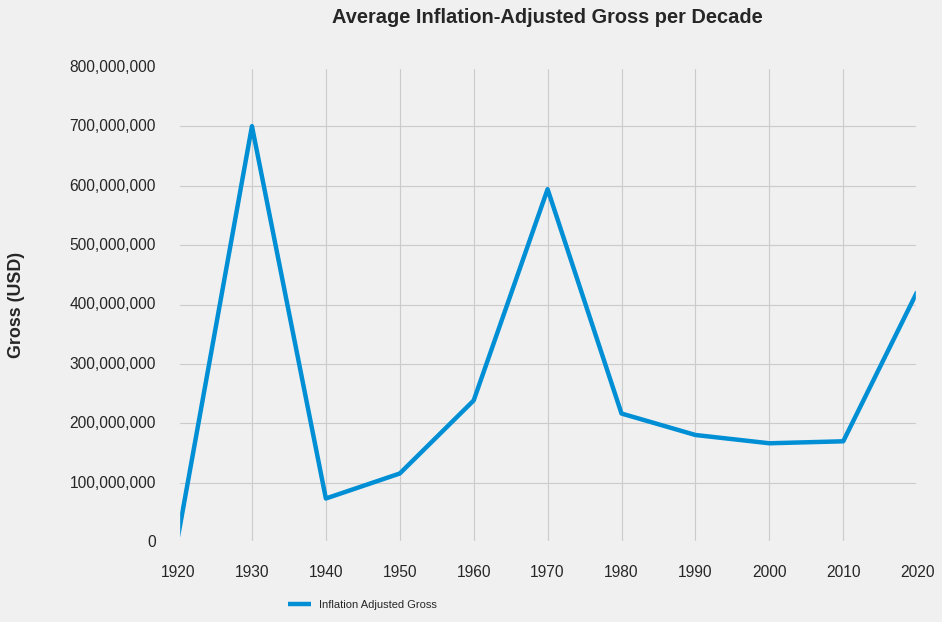

In [1555]:
fig, ax1 = plt.subplots(figsize=(12, 8))
adjusted_gross = ax1.plot(gross_per_decade.index.astype(int).astype(str), gross_per_decade["adjusted_for_inflation"], label="Inflation Adjusted Gross")

ax1.tick_params(axis='x', pad=20) 
ax1.tick_params(axis='y', pad=20)

ax1.legend(loc='upper center', bbox_to_anchor=(0.25, -0.1), ncol=1)

ax1.set_title("Average Inflation-Adjusted Gross per Decade")
ax1.set_ylabel("Gross (USD)", labelpad=40)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x:,.0f}"))

plt.savefig("gross-per-decade.png")
plt.show()

In [1559]:
data[["gross_amount", "release_year", "name"]][(data["release_year"] >= 2020) & (data["release_year"] < 2030)]

,gross_amount,release_year,name
36,381593754.0,2023,Spider-Man: Across the Spider-Verse
43,282144358.0,2024,Dune: Part Two
59,NaN,2023,12th Fail
101,329862540.0,2023,Oppenheimer
124,NaN,2020,Hamilton
136,2122771.0,2020,The Father
140,718732821.0,2022,Top Gun: Maverick
175,814866759.0,2021,Spider-Man: No Way Home
194,NaN,2024,Maharaja
223,NaN,2021,Jai Bhim


## Most Added to Watchlist

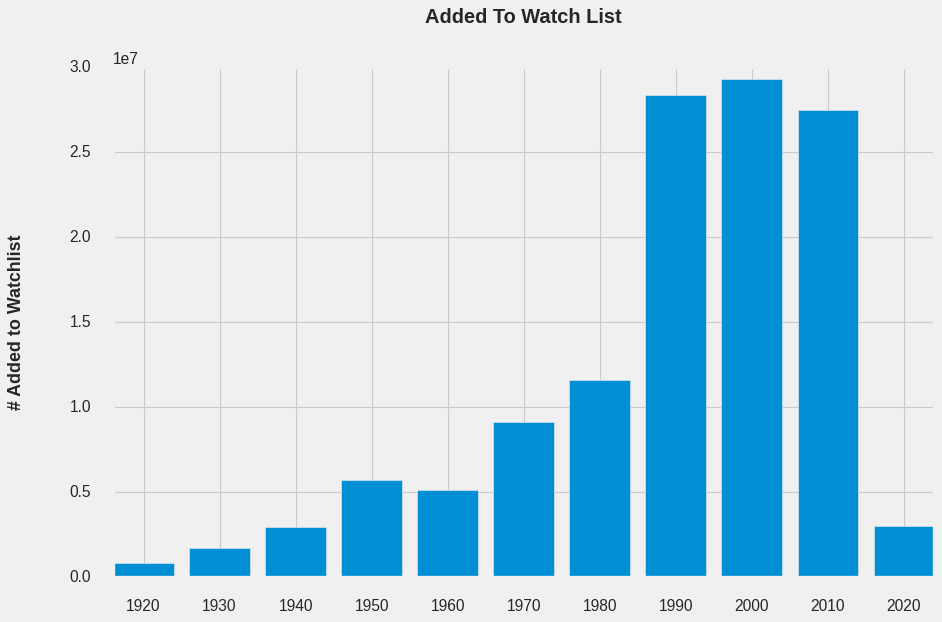

In [1331]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["added_by"], label="Added To Watchlist")

# ax2 = ax1.twinx()
# ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Added To Watch List")
ax1.set_ylabel("# Added to Watchlist", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

plt.show()

## Reviews

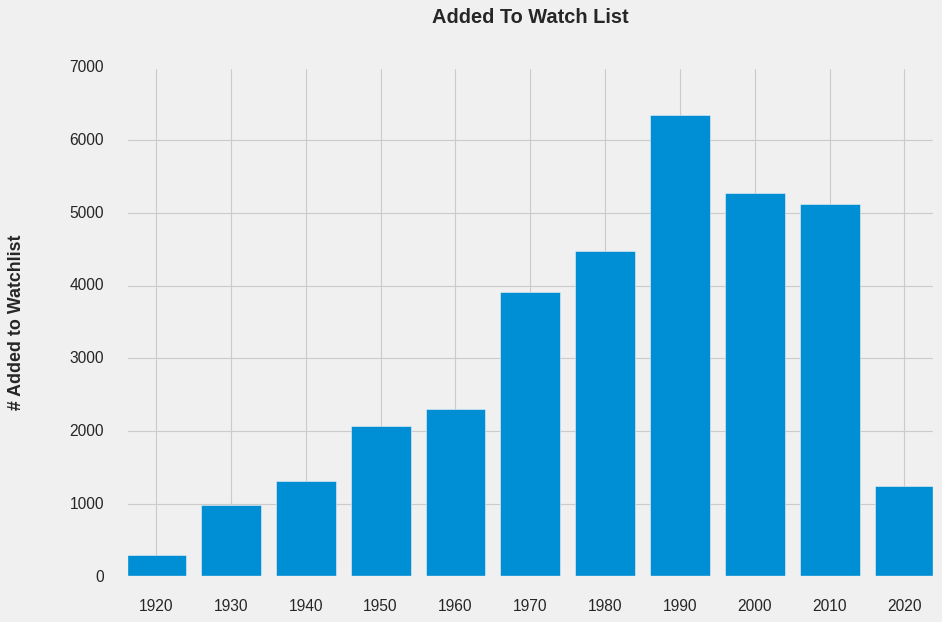

In [1334]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["reviews"], label="Reviews")

# ax2 = ax1.twinx()
# ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Added To Watch List")
ax1.set_ylabel("# Added to Watchlist", labelpad=40)


plt.show()

## Production Companies

In [1397]:
exploded_productions = data.copy()

In [1398]:
exploded_productions["production"] = exploded_productions["production"].apply(literal_eval)

In [1399]:
exploded_productions = exploded_productions.explode("production")

In [1411]:
top_production_companies = exploded_productions.groupby("production").agg({
    "url": "count",
    "rating": "mean",
    "metascore": "mean",
    "wins": "sum",
    "nominations": "sum"
}).sort_values(by=["url", "rating"], ascending=False).head(10)

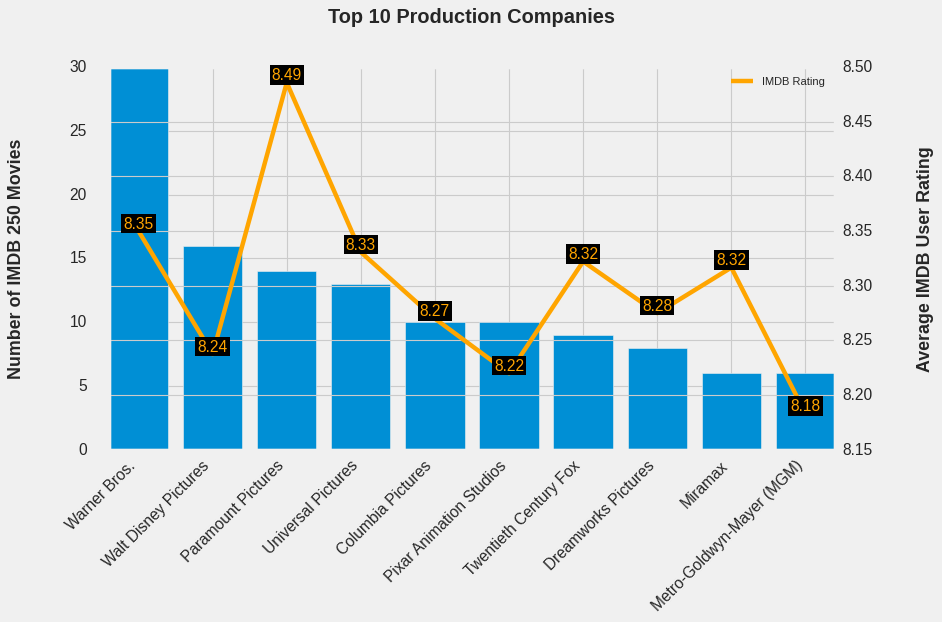

In [1437]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(top_production_companies.index, top_production_companies["url"], label="Production Company")
ax2 = ax1.twinx()
ratings = ax2.plot(top_production_companies.index, top_production_companies["rating"], c="orange", label="IMDB Rating")

ax1.set_xticks(range(len(top_production_companies.index)))
ax1.set_xticklabels(top_production_companies.index, rotation=45, ha="right")

ax1.tick_params(axis="x", rotation=45)
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Top 10 Production Companies")
ax1.set_ylabel("Number of IMDB 250 Movies", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

for x, y in zip(top_production_companies.index, top_production_companies["rating"]):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )

ax2.legend(loc='upper right',)


plt.show()

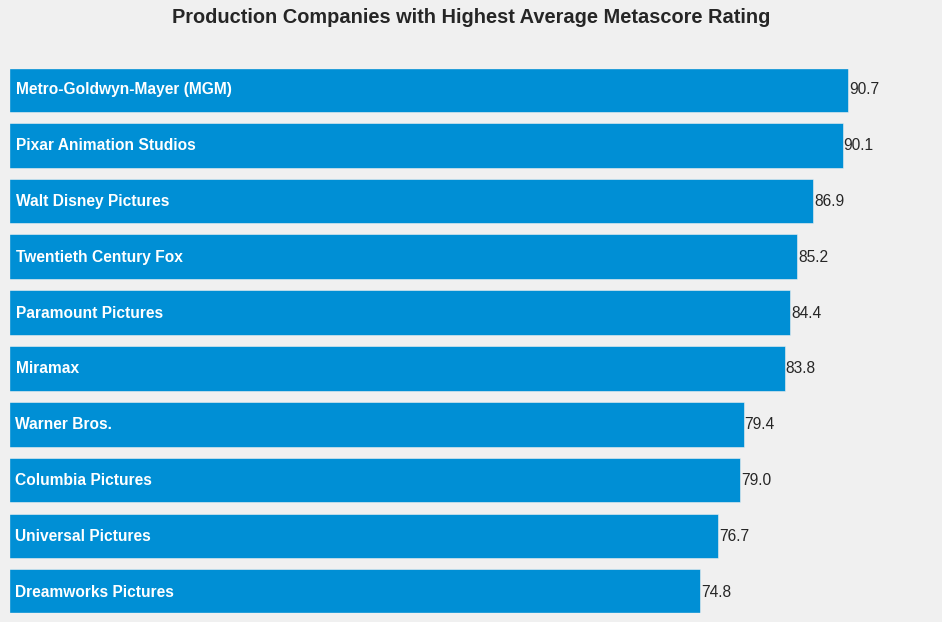

In [1454]:
top_production_companies_metascore = top_production_companies.sort_values(by="metascore", ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_production_companies_metascore.index, top_production_companies_metascore['metascore'])
ax.set_title("Production Companies with Highest Average Metascore Rating")
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(width * 0.01,
            y_position,
            f'{top_production_companies_metascore.index[idx]}',
            ha="left", va="center",  
            color="white",
            fontweight='bold')  

    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{top_production_companies_metascore["metascore"].iloc[idx]:.1f}',  
            ha="left", va="center")
    
    
plt.savefig("top-10-most-ratings.png")
plt.show()